In [3]:
import matplotlib.backends.backend_agg as backends


In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Il y a deux principales interdaces avec matplotlib : l'interface OO et pyplot, la seconde surement moins flexible/puissante / plus limitée et surtout un-pythonic propose une interface par succession de commandes en plt.do_something() avec plt=matplotlib.pyplot. 
Essayer de ne pas mélanger les deux.

matplotlib.figure() retourne un objet matplotlib.figure.Figure, c'est cet objet qui est passé à matplotlib.show().

Autrement : 
* fig.add_subplot() : retourne un objet matplotlib.axes._subplots.AxesSubplot
* fig, axes = plt.subplots() renvoit un tuple (matplotlib.figure.Figure, numpy.ndarray), chaque élément de l'array est de type matplotlib.axes._subplots.AxesSubplot

MRO d'un objet matplotlib.axes._subplots.AxesSubplot : 
(matplotlib.axes._subplots.AxesSubplot,
 matplotlib.axes._subplots.SubplotBase,
 matplotlib.axes._axes.Axes,
 matplotlib.axes._base._AxesBase,
 matplotlib.artist.Artist,
 object)
 
En gros faire une arborescence simple pour accéder à tt ce qu'on veut sur le plot 

- Axes
    |- xaxis
        |- set_tick_labels
        
quand on impose un geom (axes.bar() par ex) : modifie in place l'objet? A-t-on toujours les mêmes attributs.
Recensser les types d'entrées (notamment les arrays, pour les couleurs, etc.).
Passer directement des séries pandas ?
Apport de seaborn. Se dirige vers une implémentation de la gg ?

In [26]:
help(axe)

Help on AxesSubplot in module matplotlib.axes._subplots object:

class AxesSubplot(SubplotBase, matplotlib.axes._axes.Axes)
 |  AxesSubplot(fig, *args, **kwargs)
 |  
 |  Base class for subplots, which are :class:`Axes` instances with
 |  additional methods to facilitate generating and manipulating a set
 |  of :class:`Axes` within a figure.
 |  
 |  Method resolution order:
 |      AxesSubplot
 |      SubplotBase
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods inherited from SubplotBase:
 |  
 |  __init__(self, fig, *args, **kwargs)
 |      *fig* is a :class:`matplotlib.figure.Figure` instance.
 |      
 |      *args* is the tuple (*numRows*, *numCols*, *plotNum*), where
 |      the array of subplots in the figure has dimensions *numRows*,
 |      *numCols*, and where *plotNum* is the number of the subplot
 |      being created.  *plotNum* starts at 1 in the upper left
 |      corner a

https://www.southampton.ac.uk/~fangohr/training/python/notebooks/Matplotlib.html

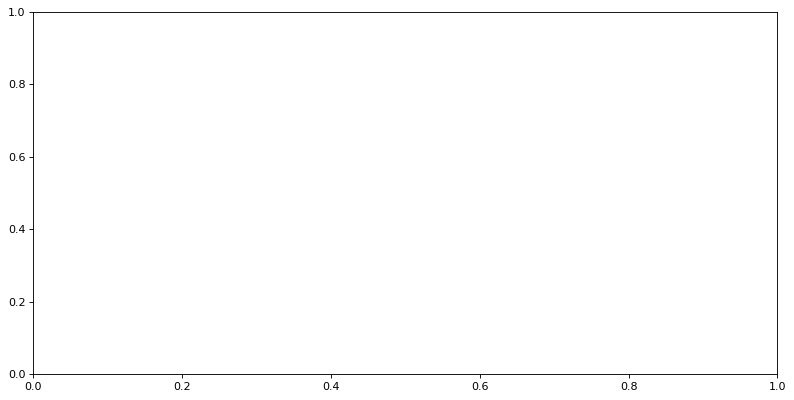

In [2]:
fig = plt.figure(figsize=(12,6), dpi = 80)
axe = fig.add_subplot(111) #retourne une instance de la classe Axes

In [4]:
# Et la méthode fig.add_axes() ? Différence Subplot / Axes ? 

x = np.linspace(-np.pi, np.pi, num=100) # Retourne un np.array constitué de 100 éléments équirépartis de [start, stop]
y = np.cos(x)
z = np.sin(x)

line = axe.plot(x,y, marker = '.', linewidth = 0.5, label = 'cos') # Retourne une instance de la classe Line2D
axe.plot(x,z, color = 'g', linestyle = '--', label = 'sin')
axe.legend(loc='best') # peut aussi être fait avec plt.legend(loc=best)

In [ ]:
fig = plt.figure(figsize=(12,6), dpi = 80)
axe = fig.add_subplot(111) #retourne une instance de la classe Axes 

# Et la méthode fig.add_axes() ? Différence Subplot / Axes ? 

x = np.linspace(-np.pi, np.pi, num=100) # Retourne un np.array constitué de 100 éléments équirépartis de [start, stop]
y = np.cos(x)
z = np.sin(x)

line = axe.plot(x,y, marker = '.', linewidth = 0.5, label = 'cos') # Retourne une instance de la classe Line2D
axe.plot(x,z, color = 'g', linestyle = '--', label = 'sin')
axe.legend(loc='best') # peut aussi être fait avec plt.legend(loc=best)

# Axis
axe.set_xlim(-3.5, 3.5)
axe.set_ylim(-np.pi/3, np.pi/3)

axe.set_title('Cosinus et sinus') # vs axe.title ? C'est un getter ? Text Object
axe.set_xlabel('Abscisses')
axe.set_ylabel('Ordonnées')


axe.grid(b=True, axis='both', which='Major')
axe.grid(b=True, axis='both', which='Minor', alpha = 0.5, linestyle = '--') # Il y a des arguments spécifiques à la grille mais
# on peut aussi ajouter beaucoup de kwargs pour en contrôler l'aspect comme pour les line plots.

# Ticks

axe.set_xticks(np.linspace(-np.pi, np.pi, 5), minor=False)
axe.set_xticks(np.linspace(-3*np.pi/4, 3*np.pi/4, 4), minor=True)
axe.set_yticks(np.linspace(-1, 1, 5), minor=False)
axe.set_yticks([-0.75, -0.25, 0.25, 0.75], minor=True)

axe.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], minor = False)
axe.set_xticklabels([r'$-3\pi/4$', r'$-\pi/4$', r'$+\pi/4$', r'$+3\pi/4$'], minor = True)

# line.setp(color='r') / penser aux colormaps

# Déplacer les axes : on se sert des objets Spines qui sont les quatre lignes délimitant le graphe. On en fait disparaitre deux
# et en déplacent deux pour placer les axes au centre du repère

axe.spines['bottom'].set_visible(False) # marche aussi avec .set_color(None)
axe.spines['left'].set_visible(False)

axe.spines['top'].set_position(('data', 0))
axe.spines['right'].set_position(('data', 0))

axe.xaxis.set_ticks_position('top')
axe.yaxis.set_ticks_position('right')

axe.xaxis.set_label_coords(0.65,0.48)
axe.yaxis.set_label_coords(0.49,0.75)

# Bizarre : les objets XAxis et YAxis héritent de Axis (à ne pas comfondre avec Axes). Ces objets ne sont en revanchent pas
# reliés à Spine qui ne partagent avec eux que l'héritage de la classe abstraite Artist.
# Les 'attributs graphiques' de XAxis et YAxis ont l'air (par défaut) liés aux Spines 'bottom' et 'left' respectivement: 
# Cela veut dire que par défaut, la ticks_postion et label_position est 'bottom' et 'left'
# Implique : Si on centre la Spine 'top' et rend non visible la Spine 'bottom', l'axe semblera s'être déplacé au centre mais
# il n'aura plus de ticks et le xlabel sera encore en bas.
# Autre implication : les ticks labels sont toujours dirigés vers l'extérieur d'une Spine.
# Ex1 : Si on veut des ticks vers le haut, c'est la Spine 'top' qui doit recevoir les ticks, le label, être centrée, la Spine 
# bottom étant rendue invisible
# Ex2 : Si on veut les axes sur les cotés avec des ticks vers l'intérieur, les ticks_position doivent être réglées sur 'both' et
# les Spines échangées de place.

plt.show(fig)

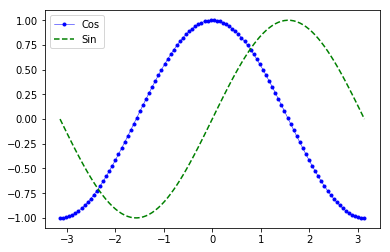

In [29]:
plt.close()

# Marche aussi avec 
x = np.linspace(-np.pi, np.pi, num=100) # Retourne un np.array constitué de 100 éléments équirépartis de [start, stop]
y = np.cos(x)
z = np.sin(x)

line1, line2 = plt.plot(x, y, x, z) # plt.plot() retourne une liste d'objets Line2D qu'on récupère par unpacking

# Le code suivant est encore une autre possibilité

if False: 
    line1 = plt.plot(x, y, color='b', linewidth=0.5, marker='.', label='Cos')
    line2 = plt.plot(x, z, color='g', linestyle='--', label='Sin')

# On peut modifier les propriétés de chaque ligne à partir de son objet Line2D

switch = True

if switch:

    line1.set_color('b')
    line1.set_linewidth(0.5)
    line1.set_marker('.')
    line1.set_label('Cos')

    line2.set_color('g')
    line2.set_linestyle('--')
    line2.set_label('Sin')

# On peut faire la même chose de façon plus compacte avec la fonction .setp() (set properties):

if not switch:
    plt.setp(line1, color = 'b', linewidth = 0.5, marker = '.', label = 'Cos')
    plt.setp(line2, color = 'g', linestyle = '--', label = 'Sin')


plt.legend(loc='best')    
plt.show()

# Ici, les objets Figures, Axes, etc. sont instanciés implicitement lors de l'appel de plt.plot(). On peut sans doute 
# les récupérer avec les fonctions plt.gca() et plt.gcf()

# On voit que la taille de la figure correspond à la figsize par défaut utilisée lors de l'instanciation de la Figure à l'appel
# de plt.plot(). C'est aussi le cas pour d'autres propriétés de nombreux objets implicitement instanciés. Pour la Figure, 
# modifier sa taille doit se faire avant l'appel de plt.plot(), la fonction utilise en effet plt.gcf() qui crée une nouvelle 
# figure (avec paramètres par défaut) s'il n'en existe pas déjà une (qui serait choisie le cas échéant).

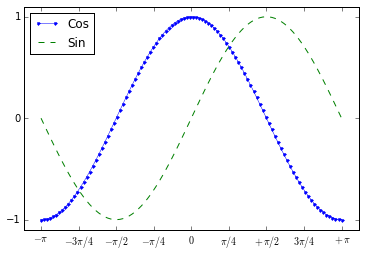

In [4]:
plt.close()

# De façon équivalente, on pouvait aussi faire :

x = np.linspace(-np.pi, np.pi, num=100) 
y = np.cos(x)
z = np.sin(x)

line1, line2 = plt.plot(x, y, '.-b', x, z, '--g') # On peut ajouter des kwargs pour les propriétés des lines mais ils 
# s'appliqueront à toutes les Lines2D simultanément

line1.set_linewidth(0.5)
line1.set_label("Cos")

line2.set_label("Sin")

plt.legend(loc="best")

plt.xlim(-3.5, 3.5)
plt.ylim(-1.1, 1.1)

plt.xticks(np.linspace(-np.pi, np.pi, 9),\
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$', r'$+\pi/2$', r'$3\pi/4$', r'$+\pi$'])
plt.yticks(np.linspace(-1, 1, 3))
 

# plt.xticks(loc, labels, **kwargs), les **kwargs s'il y en a, doivent être relatifs à des propriétés d'objet Text. 'loc' est
# un array de tick locations qui est aussi utilisé comme labels si un array de tick labels (de même longueur) n'est pas fourni

plt.show()

In [100]:
np.linspace(-np.pi, np.pi, 10)

array([-3.14159265, -2.44346095, -1.74532925, -1.04719755, -0.34906585,
        0.34906585,  1.04719755,  1.74532925,  2.44346095,  3.14159265])

<Figure size 432x288 with 0 Axes>

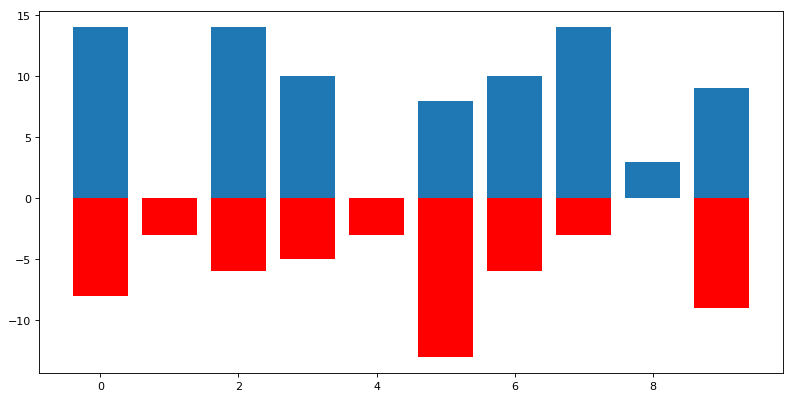

In [31]:
plt.clf()
# plt.cla() résoudre le problème
fig = plt.figure(figsize=(12,6), dpi = 80)

size = (10,2)
x = np.random.randint(0, 15, size)

axe = fig.add_subplot(111) #retourne une instance de la classe Axes
axe.bar(range(size[0]),x[:,0])
axe.bar(range(size[0]),-1 * x[:,1], color = 'r')
plt.show(fig)

In [102]:
u = np.random.randn(10,2)
u

array([[-1.54820367, -0.84715555],
       [-0.30599758,  1.3314862 ],
       [ 1.21424934, -1.27957507],
       [-0.37628538,  0.80423805],
       [ 0.66010736, -0.63667006],
       [ 0.7356436 ,  1.13827551],
       [-1.17274976, -0.5433491 ],
       [-1.35262936,  0.16569584],
       [-0.53638268,  0.59690213],
       [ 0.57683777, -0.6524924 ]])

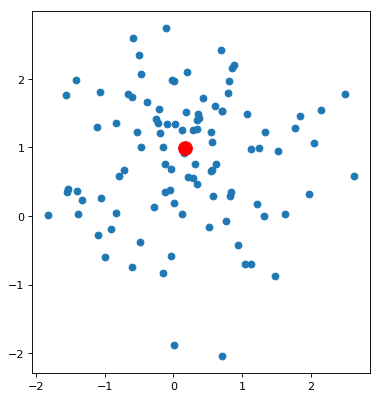

In [103]:
plt.clf()

x = np.random.randn(100)
y = np.random.randn(100)+1

fig = plt.figure(figsize=(12,6), dpi = 80)
axe = fig.add_subplot(111, aspect = 'equal') # L'arg. 'equal' impose la même échelle sur les deux axes (mais pas complètement)

# Une alternative serait 

if False:
    cmin, cmax = min(min(x), min(y)), max(max(x), max(y))
    cmin -= 0.05*(cmax - cmin)
    cmax += 0.05*(cmax - cmin)
    
    axe.set_xlim(cmin, cmax)
    axe.set_ylim(cmin, cmax)

axe.scatter(x,y)

# On peut aussi utiliser scatter pour un seul point, par exemple : le centre du nuage

axe.scatter(np.median(x), np.median(y), c='r', s = 150)

plt.show(fig)

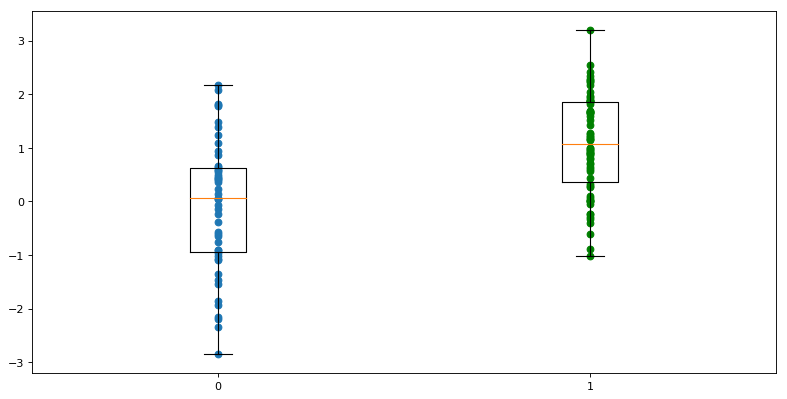

In [104]:
# On peut superposer des types de graphes 
plt.clf()
fig = plt.figure(figsize=(12,6), dpi=80)
axe = fig.add_subplot(111)

x = np.random.randn(50)
x_pos = [0]*len(x)
y = np.random.randn(70)+1
y_pos = [1]*len(y)
X = [x,y]

axe.boxplot(X, positions=[0,1]) # Prend en argument un tableau (et fait une boite par colonne) ou une séquence de vecteurs
axe.scatter([0]*len(x), x)
axe.scatter([1]*len(y), y, c='g')

# Remarque : si on veut les boxplots à l'horizontale : vert=False

plt.show(fig)

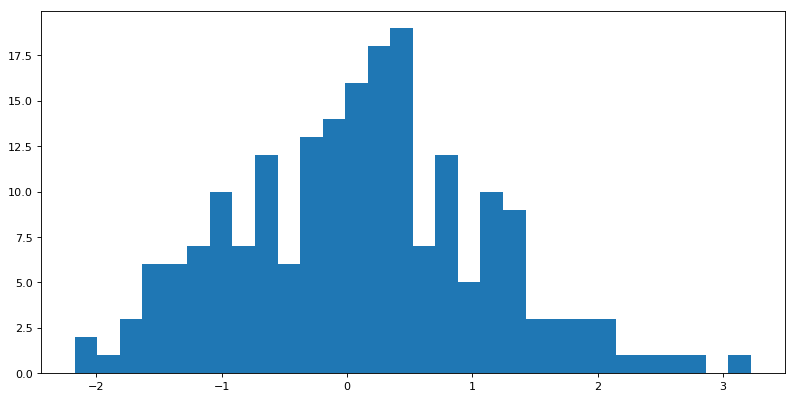

In [105]:
plt.clf()
x = np.random.randn(200)
fig = plt.figure(figsize=(12,6), dpi = 80)
axe = fig.add_subplot(111) #retourne une instance de la classe Axes
axe.hist(x, bins=30)
plt.show(fig)

<Figure size 432x288 with 0 Axes>

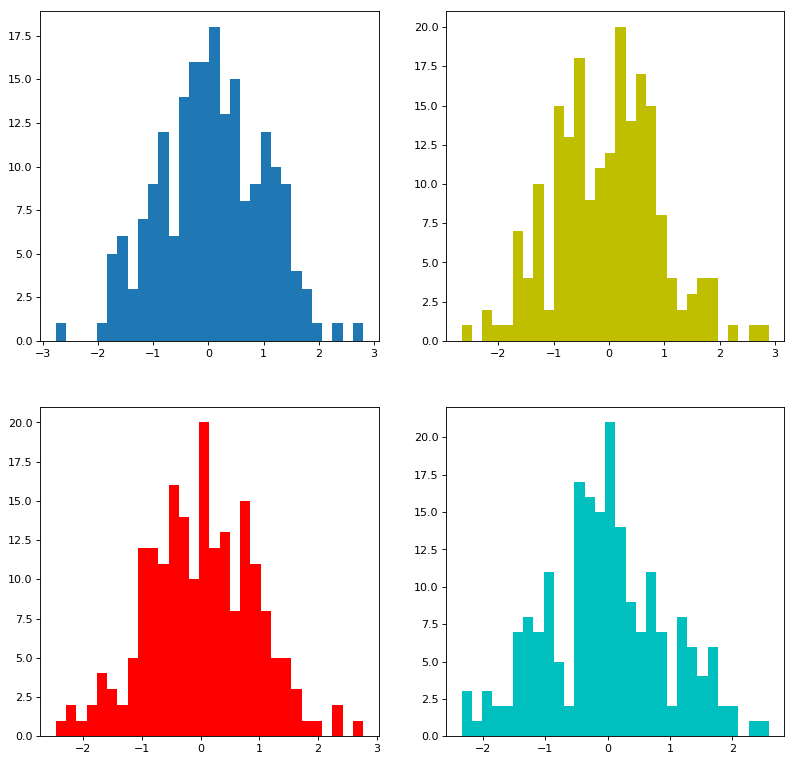

In [17]:
plt.clf()
x = np.random.randn(200,4)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12), dpi = 80) # Create a new Figure and a set of Axes (returned as an array)
axes[0,0].hist(x[:,0], bins=30)
axes[1,0].hist(x[:,1], bins=30, color='r')
axes[0,1].hist(x[:,2], bins=30, color='y')
axes[1,1].hist(x[:,3], bins=30, color='c')
plt.show(fig)

In [20]:
type(axes[1,1])

matplotlib.axes._subplots.AxesSubplot

In [107]:
x = np.random.randn(200,4)
x[:5,:4]

array([[-0.07058175, -0.73388721, -0.10088303, -0.40808784],
       [-1.14527235,  0.72277663, -1.01300688,  2.35017483],
       [-0.08846539, -0.61923499,  0.11980437, -0.12960732],
       [ 1.01146262, -0.97410325,  0.36545646,  0.7961421 ],
       [ 1.40112188,  0.74177651,  0.24282924,  0.12414094]])

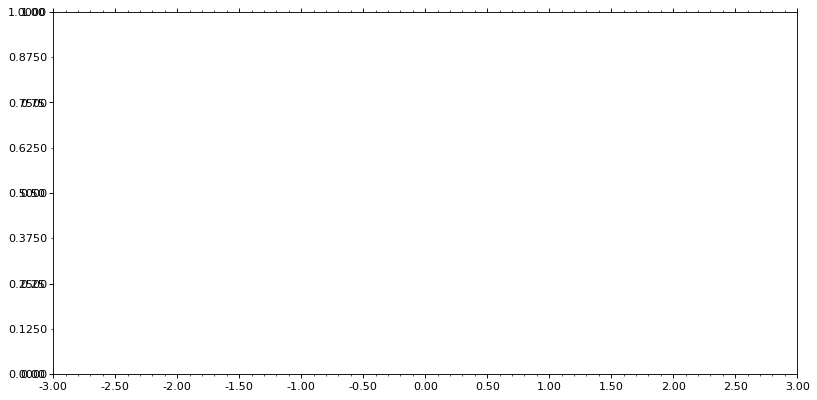

In [119]:
plt.clf()
fig = plt.figure(figsize=(12,6), dpi = 80)
axe = fig.add_subplot(111)

axe.xaxis.set_ticks_position('both')
axe.set_xlim([-3,3])
axe.set_ylim([0,1])

axe.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
axe.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))

axe.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.25))
axe.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.125))

# La sous-classe Locator de la classe Ticker propose de nombreuses autres formes de Locator adaptées à différents besoins
# Différents exemples de Locator : http://matplotlib.org/examples/ticks_and_spines/tick-locators.html
# La sous-classe Formatter correspond à des fonctions qui retourne la string qui figurera sur l'axe à partir de sa position 
# (définie par le locator) et d'éventuelles intructions de formattage. Par exemple NullFormatter() ne retourne qu'une chaîne vide
# pour chaque localisation : il n'y aura donc pas de label pour l'axe désigné.
# Différents exemples de Formatter : https://matplotlib.org/examples/ticks_and_spines/tick-formatters.html
# Pour les dates cela peut s'avérer un peu plus technique et peut demander plus de customisation : voir RRule

axe.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%0.2f'))
axe.yaxis.set_minor_formatter(mpl.ticker.StrMethodFormatter('{x:.4f}')) # On voit que minor et major se recouvrent

# D'autres Formatter comme FixedFormatter prennent juste une liste de strings qu'ils retourne tel quel (~identité). Le label
# dépend de sa position dans la liste qu'on a pu par exemple générér via une comprehension list
# ex: minors = ["%.2f" % (x-int(x)) if (x-int(x)) else "" for x in np.arange(0, 5, 0.25)]

plt.show()

### ```plt.figure()```
L'objet *Figure* hérite de la classe abstraite *Artist* et est le "top level container for all plot elements". On la désigne souvent comme étant la fenêtre qui va s'ouvrir et dans laquelle sera tracée le graphique. Si on instancie une *Figure* ```fig``` et qu'on l'affiche via ```plt.show(fig)```, une simple fenêtre vide s'affiche. On la ferme avec la commande ```plt.close(fig)``` qui vide également la mémoire. Pour ces deux dernières fonctions, l'abscence d'argument entraine l'appel de ```plt.gcf()``` (get current figure qui possède son équivalement pour les *Axes* : ```plt.gca()```) dont l'output servira d'argument à la fonction.

La fonction ```plt.figure(*args)``` instancie et retourne un nouvel objet *Figure*.

*Remarque* : ```plt.cla()``` supprime un objet *Axe*, ```plt.clf()``` supprime une Figure et les axes qu'elle contient mais ne referme pas la fenêtre (fonction équivalente aux méthodes de la classe *Figure* telles que ```fig.clear()``` ou ```fig.clf()```). La fonction ```plt.close()``` ferme la fenêtre et supprime tout son contenu (objets *Figure*, *Axes*). Elle libère totalement la mémoire ce qui peut être utile si une fonction appelle de nombreuses fois un plot particulièrement lourd.

### ```fig.add_subplot()```
La méthode ```fig.add_subplot(*args, *kwargs)``` instancie et retourne un nouvel objet Axes qui est ajouté à la liste des *Axes* de la *Figure* ```fig```. La fonction demande des paramètres (```nrows```, ```ncols```, ```plot_number```) qui supposent le découpage de la figure en ```nrows``` x ```ncols``` parties de taille égale où seront logés ```nrows``` x ```ncols``` graphes indexés de 1 à ```nrows``` x ```ncols```.

Par exemple, ```fig.add_subplot(2,1,2)``` retourne un objet *Axes* qui sera le support du graphe qui occupera le bas d'une fenêtre divisée en deux emplacements sur deux lignes et une colonne.

*Remarque* : Une fonction comme ```plt.plot(...)``` créer implicitement un ```subplot(1,1,1)```.

*Remarque* : pour des découpages plus sophistiqués de la *Figure* en plusieurs *Axes*, voir ```GridSpec```, ```subplot2grid```. Pour éviter les recouvrements entre les labels des différents axes ou plus généralement gérer les problèmes de disposition, voir des fonctions comme ```tight_layout()```, ```subplots_adjust()```, etc. 

### ```fig.add_axes()```
La méthode ```fig.add_axes(*args, *kwargs)``` instancie et retourne un nouvel objet *Axes* qui est contenu dans la *Figure* ```fig```. Contrairement aux autre méthodes de création d'*Axes*, ```.add_axes()``` demande explicitement en argument la position et les dimension qu'occupera l'objet *Axes* dans ```fig``` en proportion de la taille de l'objet *Figure*. Les autres méthodes doivent utiliser des paramètres par défaut. 

Les ```kwargs``` permettent de directement donner des valeurs à des attributs tels que ```title```, ```xlim```, ```xlabel```, ```xcale```, ```xticks``` ou ```xticklabels``` par exemple.

Dans le cas de *Figure* contenant une multitude d'*Axes*, ```.add_axes()``` (et contrairement à ```add_subplot()``` par exemple) ne gère pas le positionnement relatif des différents *Axes*. La méthode ```.add_axes()``` permet au fond de gérer manuellement ce que ces fonctions font automatiquement.

Il n'y a pas de différence entre *Axes* et "subplots" (les méthodes utilisant cette dénomination retournent toujours des objets *Axes*). L'objets *Axes* est le conteneur d'un graphique particulier. Cet objet en est le principal support. C'est à lui que s'appliquent toutes les méthodes set qui servent à régler la majorité des paramètres contrôlant l'allure du graphe : ```set_xlim```, ```set_legend```, ```set_title```, ```set_xticks```, etc.

### ```plt.subplots()```
Cette fonction permet en un seul appel de générer une *Figure* et un ensemble d'*Axes* (subplots) dans une grille de taille nrows x ncols (par défaut 1x1). Elle retourne une *Figure* et un array d'*Axes*.

*Ex*: ```fig, axes = plt.subplots(2,2)``` : ```axes[0,0]``` revoit l'objet *Axes* qui contiendra le nécessaire au tracé du graphique situé dans le coin supérieur gauche de la figure. La variable ```axes``` est ici un tableau d'objets *Axes*.

*Remarque* : il semble qu'on puisse aussi utiliser ```GridSpec``` ce qui peut aussi permettre à cette fonction de générer une grille "non standard".

*Remarque* : ```plt.subplots(*args, *kwargs)``` : ici les ```kwargs``` sont en fait les arguments suportés par la classe *Figure* (```figsize```, etc.).

### ```plt.subplot()```
Prend exactement les mêmes arguments que ```fig.add_subplot()``` et a le même effet. La *Figure* à laquelle le subplot est ajouté doit implicitement être la figure courante récupérée via ```plt.gcf()```. In the current figure, create and return an Axes, at position index of a (virtual) grid of nrows by ncols axes.

### ```plt.axes()```
Semble identique à ```plt.subplot()```. Add an axes to the current figure and make it the current axes. Returns the created or activated axes.

In [21]:
mpl.__version__

'2.2.3'

In [122]:
import seaborn as sns

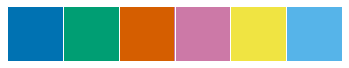

In [130]:
sns.palplot(sns.color_palette("colorblind", n_colors=6))

http://www.labri.fr/perso/nrougier/teaching/matplotlib/
https://github.com/matplotlib/AnatomyOfMatplotlib